In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('output files/wb_output.csv')
df = df.drop(columns=['Unnamed: 0'])
print(df.shape)
print(df.dtypes)
df.head()

(756, 1474)
country                                                                             object
year                                                                                 int64
Access to electricity, rural (% of rural population)                               float64
Agricultural irrigated land (% of total agricultural land)                         float64
Agricultural land (% of land area)                                                 float64
                                                                                    ...   
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)    float64
Population density (people per sq. km of land area)                                float64
Population in largest city                                                         float64
Population in the largest city (% of urban population)                             float64
Population in urban agglomerations of more than 1 million                     

,country,year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million
0,Argentina,2021,100.000000,NaN,43.102346,1179577.597,NaN,NaN,NaN,NaN,...,8.74,26.68,20.77,23.370,23.24,71.39813,16.738742,15257673.0,36.113734,19587272.0
1,Argentina,2020,100.000000,NaN,43.029265,1177577.597,NaN,NaN,NaN,86098.7125,...,11.46,34.95,26.81,30.407,30.17,73.00002,16.580893,15153729.0,36.255551,19430420.0
2,Argentina,2019,100.000000,NaN,42.590779,1165577.597,NaN,NaN,NaN,85762.3750,...,9.84,28.78,23.87,25.812,25.86,73.49278,16.420827,15057273.0,36.423390,19280518.0
3,Argentina,2018,99.922955,1.199575,42.371536,1159577.597,NaN,NaN,NaN,85839.3425,...,9.22,27.77,20.85,23.830,23.73,74.47115,16.258510,14966530.0,36.613484,19136241.0
4,Argentina,2017,100.000000,NaN,42.986381,1176404.000,NaN,NaN,NaN,86592.7575,...,8.35,26.90,19.86,22.831,22.64,74.66000,16.094191,14879100.0,36.819727,18995646.0


##### Some EDA to help guide feature selection

In [5]:
### MAKE DF TO COMPARE HOW MANY COUNTRIES HAVE 'x' METRIC FOR EACH YEAR ###
max_year = 2022
min_year = 2020
max_count = 12
min_count = 10

first_loop = True
for i in range(max_year, min_year-1, -1):
    for j in range(max_count,min_count-1,-1):
        ij_series = pd.Series(df[df['year'] == i].count() == j) # count # of metrics where the metric is the 'i' year and is present for 'j' countries
        if first_loop: # if first loop then don't need to join
            count_df = pd.DataFrame(ij_series, columns=[f"{i} - {j}"])
            first_loop = False
        else:
            ij_df = pd.DataFrame(ij_series, columns=[f"{i} - {j}"])
            count_df = count_df.join(ij_df, how='outer')

count_df = count_df.drop(index=['country', 'year']) # drop non-metric indices
# count_df.to_csv('output_countDf.csv') # export to csv, sometimes Excel is easier for quick comparison :p

count_df

,2022 - 12,2022 - 11,2022 - 10,2021 - 12,2021 - 11,2021 - 10,2020 - 12,2020 - 11,2020 - 10
"Access to electricity, rural (% of rural population)",False,False,False,True,False,False,True,False,False
Agricultural irrigated land (% of total agricultural land),False,False,False,False,False,False,False,False,False
Agricultural land (% of land area),False,False,False,True,False,False,True,False,False
Agricultural land (sq. km),False,False,False,True,False,False,True,False,False
"Agricultural machinery, tractors",False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",False,False,False,True,False,False,True,False,False
Population density (people per sq. km of land area),False,False,False,True,False,False,True,False,False
Population in largest city,False,False,True,False,False,True,False,False,True
Population in the largest city (% of urban population),False,False,True,False,False,True,False,False,True


In [7]:
### Make DF to count # of countries with the metric for each year ###
min_year = df['year'].min()
max_year = df['year'].max()

count_df = pd.DataFrame(index=df.columns[2:])  # Initialize the DataFrame with metric names as index

for i_year in range(min_year, max_year + 1):
    year_data = df[df['year'] == i_year].count()
    count_df[i_year] = year_data.values[2:]  # Assign the count values to the corresponding year column
count_df.index.name = 'datapoint'  # Set the index name to 'metric'
count_df.reset_index(inplace=True)  # Reset the index to make 'year' a regular column

# if want to transpose the DF
# count_df = count_df.transpose()  # Transpose the DataFrame to have years as columns
# count_df.index.name = 'year'  # Set the index name to 'year'
# count_df.reset_index(inplace=True)  # Reset the index to make 'year' a regular column

# count_df.to_csv('output_countDf_2.csv', index=False) # export to csv to easily compare

count_df

,datapoint,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,0
1,Agricultural irrigated land (% of total agricu...,0,0,0,0,0,0,0,0,0,...,3,2,2,3,5,4,2,2,3,0
2,Agricultural land (% of land area),0,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
3,Agricultural land (sq. km),0,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
4,"Agricultural machinery, tractors",0,12,12,12,12,12,12,12,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,"Wage and salaried workers, total (% of total e...",0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,0
1468,Population density (people per sq. km of land ...,0,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
1469,Population in largest city,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1470,Population in the largest city (% of urban pop...,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


      avg_countries
1960       1.784647
1961       2.040082
1962       2.180027
1963       2.215353
1964       2.226223


<AxesSubplot:title={'center':'Average Number of Countries with Non-NaN Values for Each Metric'}>

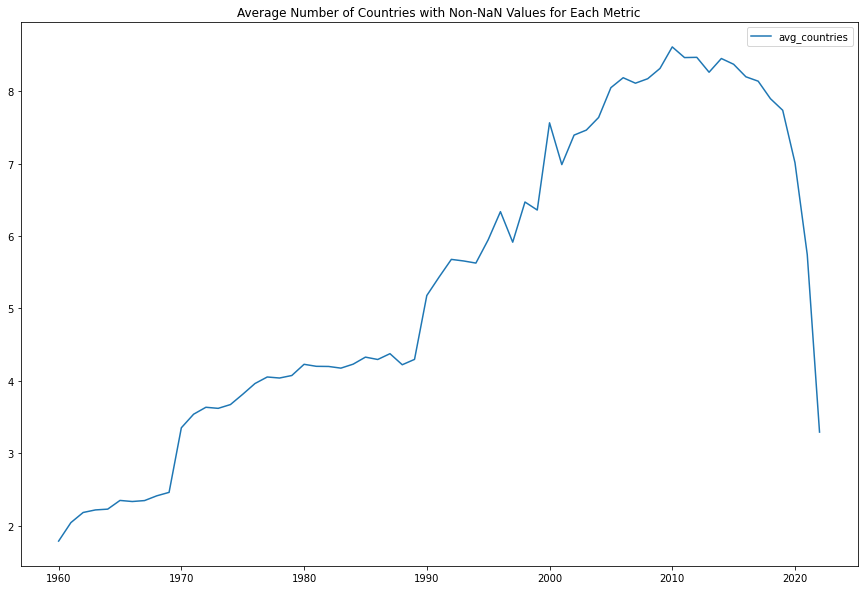

In [7]:
# using 'count_df' sum the values for each year, divide by the number of rows to get the 'avg_annual_count', and then plot a graph where the x-axis is the year and the y-axis is the 'avg_annual_count'
avg_annual_df = pd.DataFrame(index=count_df.columns[1:])

for i_year in avg_annual_df.index:
    avg_annual_df.loc[i_year,'avg_countries'] = count_df.loc[:,i_year].sum() / count_df.shape[0]

print(avg_annual_df.head())

avg_annual_df.plot(kind='line', figsize=(15,10), title='Average Number of Countries with Non-NaN Values for Each Metric')

- ^^^ comments on the above
- The # of countries that have each metric spikes to be the majority of countries from 2000-2010
- The average # of countries that have each metric plateaus around 8
- These can help serve as baselines for feature selection

#### Filter out features that don't have enough data

In [8]:
# using 'count_df' and 'year' inputs, filter out some features based on their prevalence
start_year = 1990
end_year = 2019 # will predict t+1 and most data stops at 2020
total_years = len(count_df.loc[:, start_year:end_year].columns)

avg_datapoint_df = pd.DataFrame(index=count_df['datapoint'])
avg_datapoint_df.reset_index(inplace=True)  # Reset the index to make 'datapoint' a regular column
avg_datapoint_df[f'avg_countries_{start_year}_{end_year}'] = count_df.loc[:, start_year:end_year].sum(axis=1) / total_years
avg_datapoint_df[f'max_countries_{start_year}_{end_year}'] = count_df.loc[:, start_year:end_year].max(axis=1)

year_increment = 10
for i_year in range(start_year, end_year, year_increment):
    i_end_year = i_year + year_increment - 1
    avg_datapoint_df[f'max_countries_{i_year}_{i_end_year}'] = count_df.loc[:, i_year:i_end_year].max(axis=1)

# chose to include countries with a low frequency of non-NaN values because some datapoints only seem to be measured every 10 years or so
#   e.g: 'Urban land area (sq. km)' which is measured infrequently and probably doesn't need an annual measurement
# decided to filter out datapoints that aren't present for every country at least once a decade--simplifies feature selection and aids in relevance to country
avg_datapoint_df = avg_datapoint_df[(avg_datapoint_df.iloc[:,-3:] >= 12).all(axis=1)] # filter 'avg_datapoint_df' to only include datapoints where the last three columns are >= 8
# avg_datapoint_df = avg_datapoint_df[avg_datapoint_df['avg_countries'] >= 6] # filter out datapoints that have less than 6 countries with non-NaN values

avg_datapoint_df.sort_values(by=f'avg_countries_{start_year}_{end_year}', ascending=True, inplace=True)
avg_datapoint_df

,datapoint,avg_countries_1990_2019,max_countries_1990_2019,max_countries_1990_1999,max_countries_2000_2009,max_countries_2010_2019
36,Rural land area where elevation is below 5 met...,1.2,12,12,12,12
160,Population living in areas where elevation is ...,1.2,12,12,12,12
170,Urban land area where elevation is below 5 met...,1.2,12,12,12,12
171,Urban land area where elevation is below 5 met...,1.2,12,12,12,12
40,Rural population living in areas where elevati...,1.2,12,12,12,12
...,...,...,...,...,...,...
937,"Population ages 30-34, female (% of female pop...",12.0,12,12,12,12
938,"Population ages 30-34, male (% of male populat...",12.0,12,12,12,12
939,"Population ages 35-39, female (% of female pop...",12.0,12,12,12,12
928,"Population ages 15-64, female",12.0,12,12,12,12


##### Fill in NaN values for remaining features

##### Thoughts on filling NA
- if doesn't already have a negative value, then don't allow to go negative (e.g. population should never be negative)
- if finite change and negative then we shouldn't fill with trailing/leading value because this could lead to the underlying feature being measure to go negative when it shouldn't (e.g. change in inventories of -5M, if filled could result in a remaining inventory figure that doesn't make sense)

- I'm beginning to think that if you aren't willing to examine every feature (which I'm not for this project) to bucket them into the appropriate approach, then you should fill the trailing/leading NaN with the trailing/leading value or avg/median

In [85]:
df.head()

,country,year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million
0,Argentina,2021,100.000000,NaN,43.102346,1179577.597,NaN,NaN,NaN,NaN,...,8.74,26.68,20.77,23.370,23.24,71.39813,16.738742,15257673.0,36.113734,19587272.0
1,Argentina,2020,100.000000,NaN,43.029265,1177577.597,NaN,NaN,NaN,86098.7125,...,11.46,34.95,26.81,30.407,30.17,73.00002,16.580893,15153729.0,36.255551,19430420.0
2,Argentina,2019,100.000000,NaN,42.590779,1165577.597,NaN,NaN,NaN,85762.3750,...,9.84,28.78,23.87,25.812,25.86,73.49278,16.420827,15057273.0,36.423390,19280518.0
3,Argentina,2018,99.922955,1.199575,42.371536,1159577.597,NaN,NaN,NaN,85839.3425,...,9.22,27.77,20.85,23.830,23.73,74.47115,16.258510,14966530.0,36.613484,19136241.0
4,Argentina,2017,100.000000,NaN,42.986381,1176404.000,NaN,NaN,NaN,86592.7575,...,8.35,26.90,19.86,22.831,22.64,74.66000,16.094191,14879100.0,36.819727,18995646.0


In [10]:
inter_df = df.copy()
inter_df = inter_df[inter_df['year'] >= start_year] # only want to include years that are >= 'start_year'
# filter 'inter_df' to only include columns that are in 'avg_datapoint_df['datapoint']' or are the columns 'country' or 'year'
inter_df = inter_df[['country', 'year'] + avg_datapoint_df['datapoint'].to_list()]
# remove columns from 'inter_df' that contain the string '% change from 1990' --> annoying to fill NaN, few columns, and not that relevant
inter_df = inter_df.drop(inter_df.columns[inter_df.columns.str.contains("% change from 1990")], axis=1)
inter_df = inter_df.sort_values(by=['country', 'year']).reset_index(drop=True) # sort by 'country' and 'year' and reset index
# print(inter_df.head(15).iloc[:, :3])

# for each 'country' and 'year' combo, if the value for a metric is NaN then replace it with the linear interpolation of the metric for that 'country' and 'year'
# 'limit_area'='inside' means that it will only interpolate if there are NaN values on both sides of the value to be interpolated
#   Otherwise, NaN values outside the datapoints will be interpolated to the first/last non-NaN value --> no linear growth is applied
#   Later will apply a growth rate for NaN values at the start or end of the time series
# inter_df = inter_df.groupby(['country']).apply(lambda x: x.interpolate(method='linear', limit_direction='both', limit_area='inside'))
inter_df = inter_df.groupby(['country']).apply(lambda x: x.interpolate(method='linear', limit_direction='both')) # opted for simplicity

inter_df.head(30)

,country,year,Rural land area where elevation is below 5 meters (sq. km),Population living in areas where elevation is below 5 meters (% of total population),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural population living in areas where elevation is below 5 meters (% of total population),Rural land area where elevation is below 5 meters (% of total land area),Rural land area (sq. km),Urban population living in areas where elevation is below 5 meters (% of total population),...,"Population ages 15-64, total","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 30-34, male (% of male population)","Population ages 35-39, female (% of female population)","Population ages 15-64, female",Population density (people per sq. km of land area)
0,Argentina,1990,16920.045279,0.718817,0.005206,142.991808,0.135622,0.615986,2.738252e+06,0.583195,...,19875164,7.450311,7.824520,7.043225,7.382736,6.751360,7.014554,6.399840,10018784,11.925961
1,Argentina,1991,16913.500264,0.735585,0.005444,149.536824,0.133468,0.615748,2.738106e+06,0.602117,...,20181842,7.488139,7.847989,7.013666,7.351642,6.690104,6.955990,6.382796,10165241,12.097009
2,Argentina,1992,16906.955248,0.752354,0.005682,156.081840,0.131315,0.615510,2.737960e+06,0.621039,...,20491031,7.556116,7.904035,6.975985,7.309718,6.630142,6.899480,6.367334,10312629,12.266017
3,Argentina,1993,16900.410232,0.769122,0.005921,162.626856,0.129161,0.615271,2.737814e+06,0.639961,...,20804279,7.654794,8.001791,6.934663,7.261322,6.587634,6.860561,6.342717,10462171,12.433721
4,Argentina,1994,16893.865216,0.785890,0.006159,169.171872,0.127007,0.615033,2.737668e+06,0.658883,...,21122391,7.778153,8.132933,6.909632,7.225702,6.559106,6.833047,6.302276,10613978,12.602339
5,Argentina,1995,16887.320200,0.802658,0.006397,175.716888,0.124854,0.614795,2.737522e+06,0.677804,...,21442645,7.905516,8.282669,6.915711,7.220352,6.534534,6.807234,6.256649,10767594,12.769481
6,Argentina,1996,16880.775184,0.819426,0.006635,182.261904,0.122700,0.614556,2.737376e+06,0.696726,...,21761082,8.025744,8.443170,6.958059,7.250000,6.514171,6.785409,6.208235,10921874,12.931447
7,Argentina,1997,16874.230168,0.836194,0.006874,188.806920,0.120546,0.614318,2.737230e+06,0.715648,...,22075914,8.140190,8.604004,7.033779,7.315639,6.490442,6.758550,6.163982,11075898,13.087332
8,Argentina,1998,16867.685152,0.852962,0.007112,195.351935,0.118392,0.614080,2.737084e+06,0.734570,...,22388268,8.237646,8.745408,7.139318,7.421452,6.463838,6.726661,6.136226,11229382,13.239788
9,Argentina,1999,16861.140136,0.869730,0.007350,201.896951,0.116239,0.613842,2.736938e+06,0.753492,...,22700886,8.302738,8.845468,7.268467,7.559918,6.452433,6.707549,6.121158,11382355,13.393198


In [11]:
inter_df.to_csv('output files/inter_df.csv', index=False) # will use this to test models

##### Some legacy code I opted against

In [113]:
# can see that it stops at 2015 --> if 'limit_area'='inside
# inter_df[inter_df['country'] == 'Argentina'].iloc[:, 1:3].plot(kind='line', figsize=(15,10), title='Average Number of Countries with Non-NaN Values for Each Metric', x='year')

In [114]:
### INTERPOLATE TRAILING/LEADING NaN VALUES USING CAGR ### --> opted against this

# growth_dict = {}
# na_dict = {}

# for each 'country' in 'inter_df', calculate the CAGR for each metric by looking at the first and last non-NaN values for each metric
# then fill the leading/trailing NaN values by extrapolating using the CAGR
# for country in inter_df['country'].unique():
#     for metric in inter_df.columns[2:]:
#         # print(country, metric)
#         x_data = inter_df[inter_df['country'] == country].loc[:, metric].copy()
#         count_na = x_data.isna().sum()
#         first_index = x_data.index[0]
#         start_index = x_data.first_valid_index() # first index where the value is not NaN
#         end_index = x_data.last_valid_index() # last index where the value is not NaN
#         if end_index == None or start_index == None: # all values are NaN for that country and metric combo
#             print(f"all values are NaN for {country} and {metric} combo")
#             continue
#         elif count_na == 0: # no NaN values for that country and metric combo
#             continue
#         else:
#             start_value = x_data.loc[start_index]
#             end_value = x_data.loc[end_index]
#             # if start_value <= 0 or end_value <= 0: # if either the start or end value is negative then skip
#             #     if start_index > first_index or end_index - start_index < 32:
#             #         print(f"either the start or end value is negative for {country} and {metric} combo")
#             #     continue
#             growth_rate = ((end_value / start_value) ** (1 / (end_index - start_index))) - 1
#             # growth_dict[(country, metric)] = growth_rate
#             # na_dict[(country, metric)] = count_na

#             # for each NaN value after the 'end_index' in the 'country' and 'metric' combo, replace it with the previous value * (1 + growth_rate)
#             for i in range(end_index + 1, len(x_data)+first_index):
#                 x_data.loc[i] = x_data.loc[i-1] * (1 + growth_rate)
#             # for each NaN value before the 'start_index' in the 'country' and 'metric' combo, replace it with the next value / (1 + growth_rate)    
#             for i in range(start_index - 1, first_index - 1, -1):
#                 x_data.loc[i] = x_data.loc[i+1] / (1 + growth_rate)

#             # replace the 'country' and 'metric' combo in 'inter_df' with the 'x_data' that has been interpolated
#             inter_df.loc[inter_df['country'] == country, metric] = x_data

# print(inter_df.head(30).iloc[:, :3])

In [115]:
# na_df = pd.DataFrame.from_dict(na_dict, orient='index', columns=['count_na']).reset_index().rename(columns={'level_0':'country', 'level_1':'metric'})
# na_df.sort_values(by='count_na', ascending=False)[:10]
# gr_df = pd.DataFrame.from_dict(growth_dict, orient='index', columns=['growth_rate']).reset_index().rename(columns={'level_0':'country', 'level_1':'metric'})
# gr_df.sort_values(by='growth_rate')[:10]

In [117]:
# now have data through end of years --> relevant example if 'limit_area'='inside
# inter_df[inter_df['country'] == 'Argentina'].iloc[:, 1:3].plot(kind='line', figsize=(15,10), title='Average Number of Countries with Non-NaN Values for Each Metric', x='year')